In [1]:
!pip install PyDrive
import os
import json
import datetime
import pytz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id': '1cZ4NMEAMD0Kd64wnv9epbnofDipFrNRd'})
download.GetContentFile('ECE219_tweet_data.zip')

In [4]:
!unzip ECE219_tweet_data.zip

Archive:  ECE219_tweet_data.zip
replace tweets_#nfl.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace tweets_#superbowl.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace tweets_#sb49.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace tweets_#patriots.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace tweets_#gohawks.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace tweets_#gopatriots.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [0]:
import numpy as np 
np.random.seed(42) 
import random 
random.seed(42)
import time
from textblob import TextBlob

In [0]:
def prase_dataset(file):
    start_time = time.mktime(time.strptime("2015-02-01 12:00:00",'%Y-%m-%d %H:%M:%S'))
    end_time = time.mktime(time.strptime("2015-02-02 00:00:00",'%Y-%m-%d %H:%M:%S'))   
    pst_tz = pytz.timezone('America/Los_Angeles')
    # extract raw features
    data_raw = []
    for line in open(path + file, 'r') :
        a = json.loads(line)
        citation_date = a['citation_date']
        
        if start_time < citation_date < end_time:
            ptime = datetime.datetime.fromtimestamp(citation_date, pst_tz)                    
            minute = ((ptime.hour-12))*12 + ptime.minute//5 + 1        
            text = a['tweet']['text']
            testimonial = TextBlob(text)
            data_raw.append([ptime, minute, text,
                             testimonial.sentiment.polarity,
                             testimonial.sentiment.subjectivity])

    # generate raw pandas dataframe
    pddata_raw = pd.DataFrame(data_raw,columns=['time','minute5','text',
                                                'polarity','subjectivity'])
    
    return pddata_raw

In [7]:
path = "./"

files = ["tweets_#gohawks.txt", "tweets_#gopatriots.txt", \
        "tweets_#nfl.txt", "tweets_#patriots.txt", \
        "tweets_#sb49.txt", "tweets_#superbowl.txt"]
topics = ["gohawks", "gopatriots", "nfl", "patriots", "sb49", "superbowl"]

for i, fl in enumerate(files):
    print("files[" + str(i) + "] => " + fl)


files[0] => tweets_#gohawks.txt
files[1] => tweets_#gopatriots.txt
files[2] => tweets_#nfl.txt
files[3] => tweets_#patriots.txt
files[4] => tweets_#sb49.txt
files[5] => tweets_#superbowl.txt


In [0]:
sentiment = dict()
for f in files:
    pddata = prase_dataset(f)
    grouped = pddata.groupby(pddata['minute5'])
    sentiment[f] = grouped.agg([np.sum, np.mean, np.std])

In [0]:
import pickle
filename = 'sentiment.sav'
pickle.dump(sentiment, open(filename, 'wb'))

In [0]:
sentiment = pickle.load(open('sentiment.sav', 'rb'))

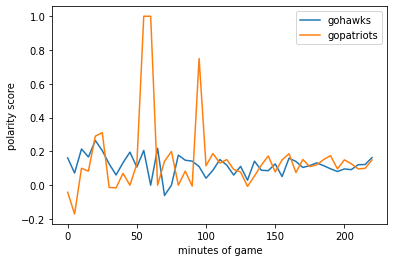

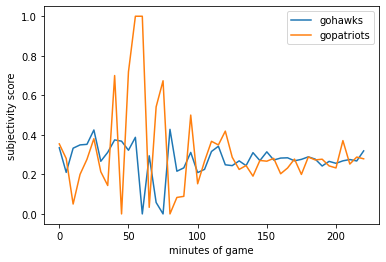

In [11]:
# during game 42(*5mins) to 86(*5imins)
gametime = [x*5 for x in range(0,45)]
plt.plot(gametime,sentiment['tweets_#gohawks.txt'][42:87]['polarity']['mean'])
plt.plot(gametime,sentiment['tweets_#gopatriots.txt'][42:87]['polarity']['mean'])
plt.xlabel('minutes of game')
plt.ylabel('polarity score')
plt.legend(['gohawks','gopatriots'])
plt.show()

plt.plot(gametime,sentiment['tweets_#gohawks.txt'][42:87]['subjectivity']['mean'])
plt.plot(gametime,sentiment['tweets_#gopatriots.txt'][42:87]['subjectivity']['mean'])
plt.xlabel('minutes of game')
plt.ylabel('subjectivity score')
plt.legend(['gohawks','gopatriots'])
plt.show()


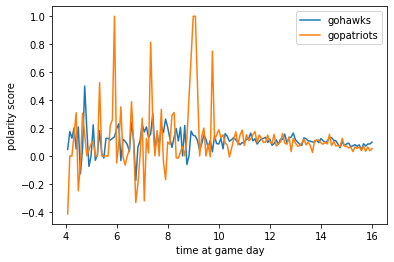

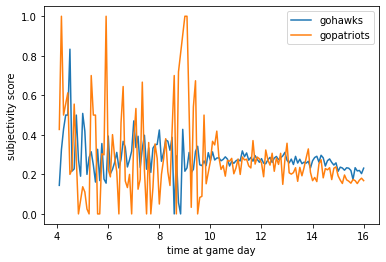

In [12]:
hours1 = [12 + x/12 for x in sentiment['tweets_#gohawks.txt'].index]
hours2 = [12 + x/12 for x in sentiment['tweets_#gopatriots.txt'].index]

plt.plot(hours1,sentiment['tweets_#gohawks.txt']['polarity']['mean'])
plt.plot(hours2,sentiment['tweets_#gopatriots.txt']['polarity']['mean'])
plt.xlabel('time at game day')
plt.ylabel('polarity score')
plt.legend(['gohawks','gopatriots'])
plt.show()

plt.plot(hours1,sentiment['tweets_#gohawks.txt']['subjectivity']['mean'])
plt.plot(hours2,sentiment['tweets_#gopatriots.txt']['subjectivity']['mean'])
plt.xlabel('time at game day')
plt.ylabel('subjectivity score')
plt.legend(['gohawks','gopatriots'])
plt.show()

tweets_#nfl.txt


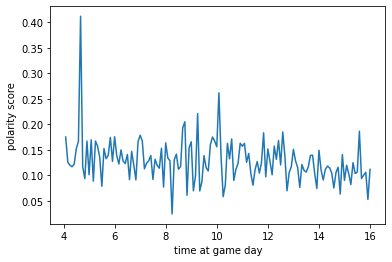

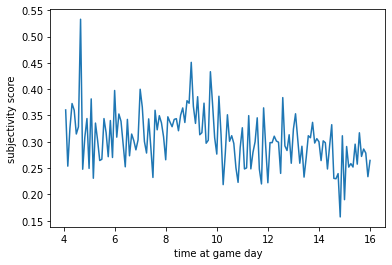

tweets_#patriots.txt


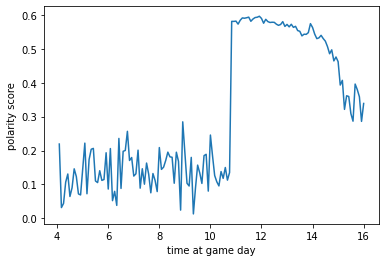

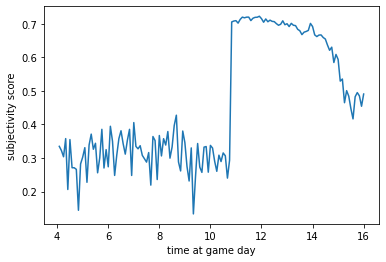

tweets_#sb49.txt


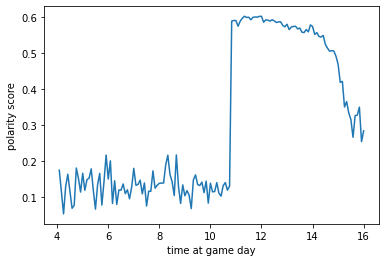

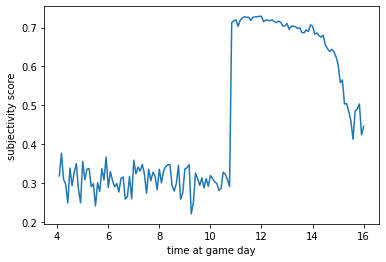

tweets_#superbowl.txt


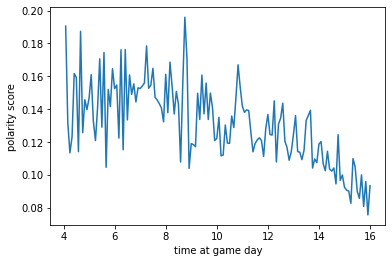

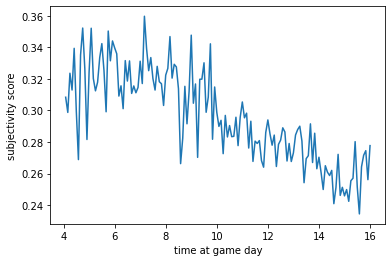

In [13]:
hours = [12 + x/12 for x in sentiment['tweets_#gohawks.txt'].index]
for f in files[2:]:
    print(f)
    plt.plot(hours,sentiment[f]['polarity']['mean'])
    plt.xlabel('time at game day')
    plt.ylabel('polarity score')
    plt.show()
    
    plt.plot(hours,sentiment[f]['subjectivity']['mean'])
    plt.xlabel('time at game day')
    plt.ylabel('subjectivity score')
    plt.show()